# 📱 Mobile Price Range Classification (ML Project)

**This project predicts the price range (0 to 3) of mobile phones based on their specifications using machine learning models such as Logistic Regression, SVM, and Random Forest. The goal is to build and compare models, tune them using GridSearchCV, and evaluate their accuracy.**


### About Dataset
#### Context
- Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

- In this problem you do not have to predict actual price but a price range indicating how high the price is

<font size = 4.5>**Step 0: Import All Required Libraries**</font>

In [1]:
# For Data handling
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# For Machine Learning Models
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

<font size = 4.5>**Step 1: Load and Understand the Dataset**</font>

- <font size = 3>**Load the Data**</font>

In [3]:
Train_df = pd.read_csv("train.csv")
Test_df = pd.read_csv("test.csv")

In [4]:
Train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


- <font size = 3>**Understand the Structure**</font>

In [5]:
print("Train Shape:", Train_df.shape)
print("Test Shape:", Test_df.shape)

Train Shape: (2000, 21)
Test Shape: (1000, 21)


- <font size = 3>**Check Column Info & Missing Data**</font>

In [6]:
Train_df.info()
print("\nMissing values in train:\n", Train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
Test_df.info()
print("\nMissing values in test:\n", Test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

- <font size = 3>**Check the Target Column(Price Range)**</font>

In [8]:
Train_df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<font size = 4.5>**Step 2: EDA (Exploratory Data Analysis)**</font>

#### Our goal here: Understand relationships between features and the target (price_range) using plots & stats.

- <font size = 3>**View Summary Stats**</font>

In [9]:
Train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- <font size = 3>**Visualize Target Distribution**</font>

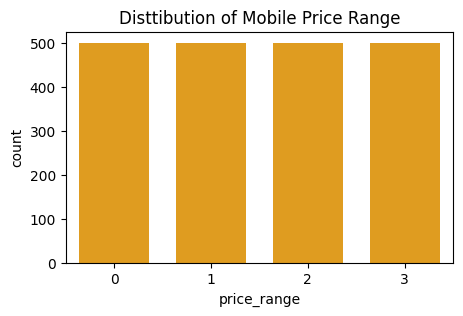

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x="price_range", data=Train_df, color="orange", gap=0.1)
plt.title("Disttibution of Mobile Price Range")
plt.show()

- <font size = 3>**Feature vs Price Range (Box Plots)**</font>

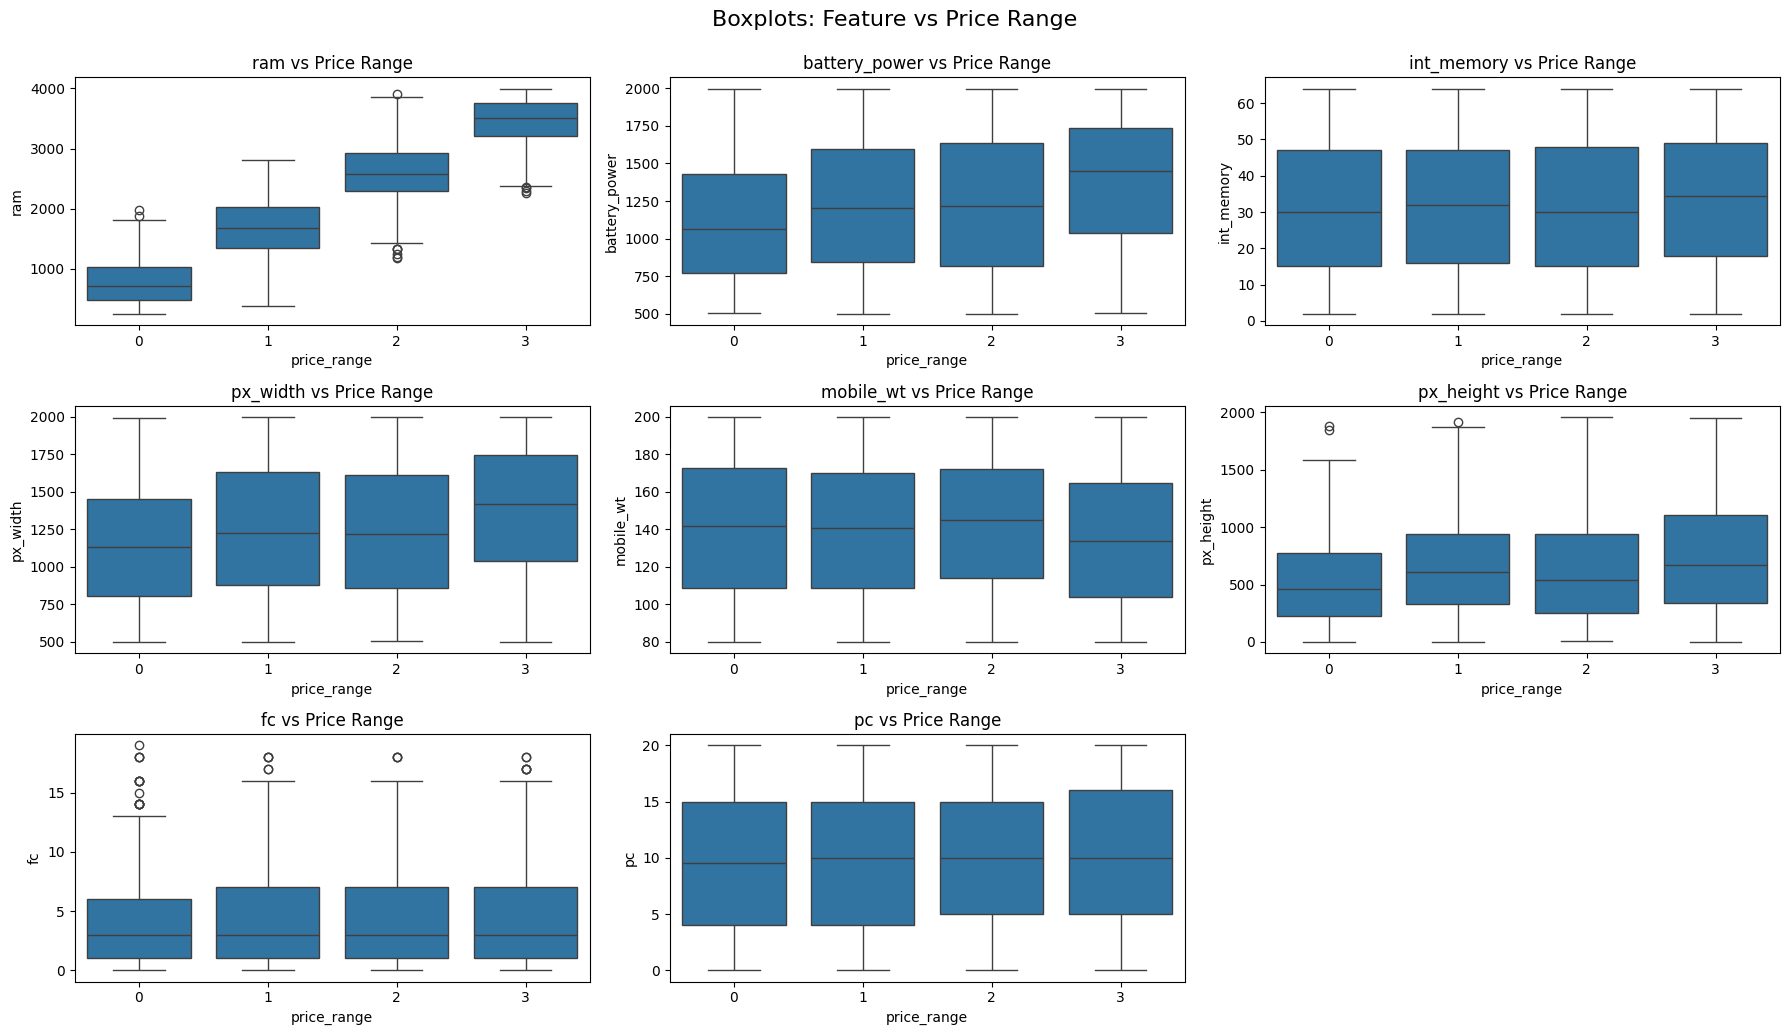

In [11]:
features = ['ram', 'battery_power', 'int_memory', 'px_width', 'mobile_wt', 'px_height', 'fc', 'pc']
plt.figure(figsize=(18,10))
for i,feat in enumerate(features):
    plt.subplot(3, 3 , i+1)
    sns.boxplot(x='price_range', y=feat, data=Train_df)
    plt.title(f"{feat} vs Price Range")
    plt.tight_layout()

plt.suptitle("Boxplots: Feature vs Price Range", fontsize=16, y=1.03)
plt.show()

- <font size = 3>**Correlation Heatmap**</font>

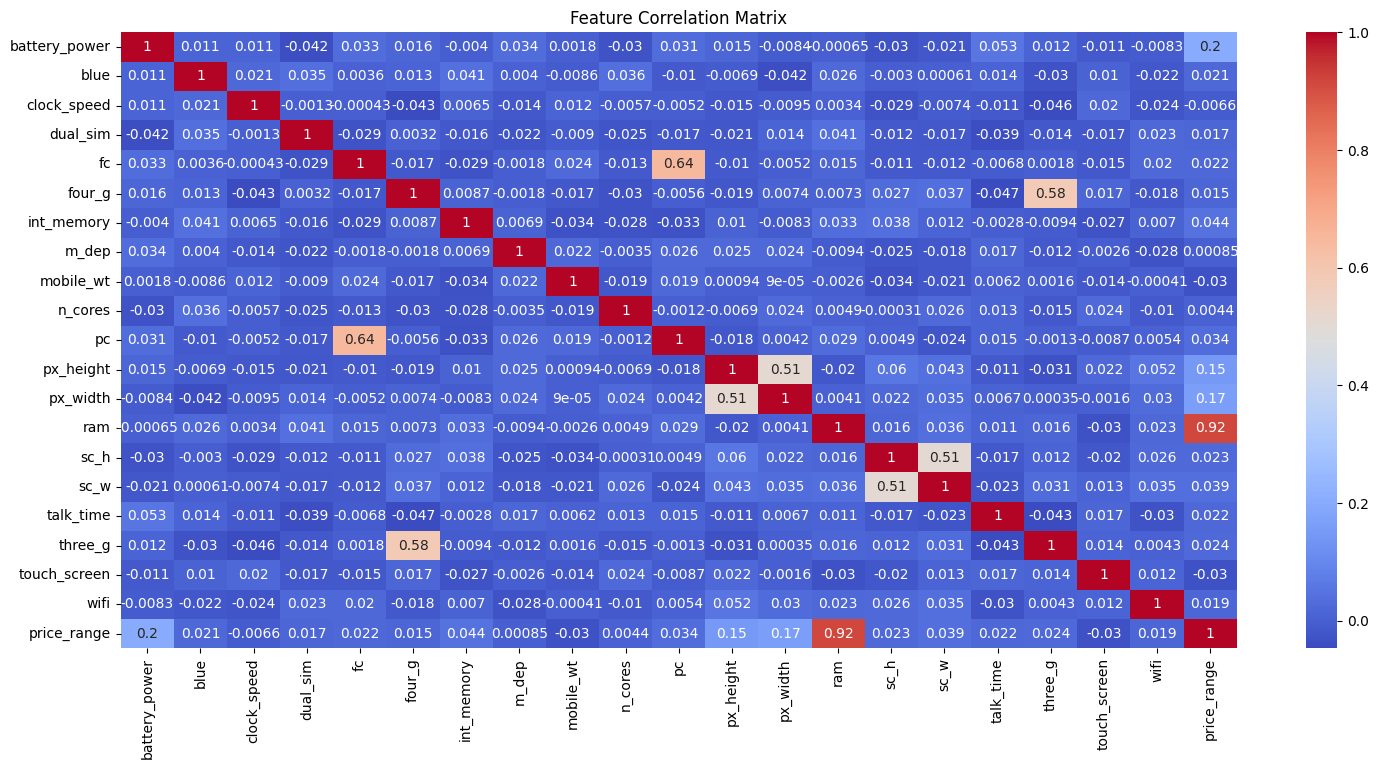

In [12]:
plt.figure(figsize=(18, 8))
sns.heatmap(Train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

- <font size = 3>**Pairplot**</font>

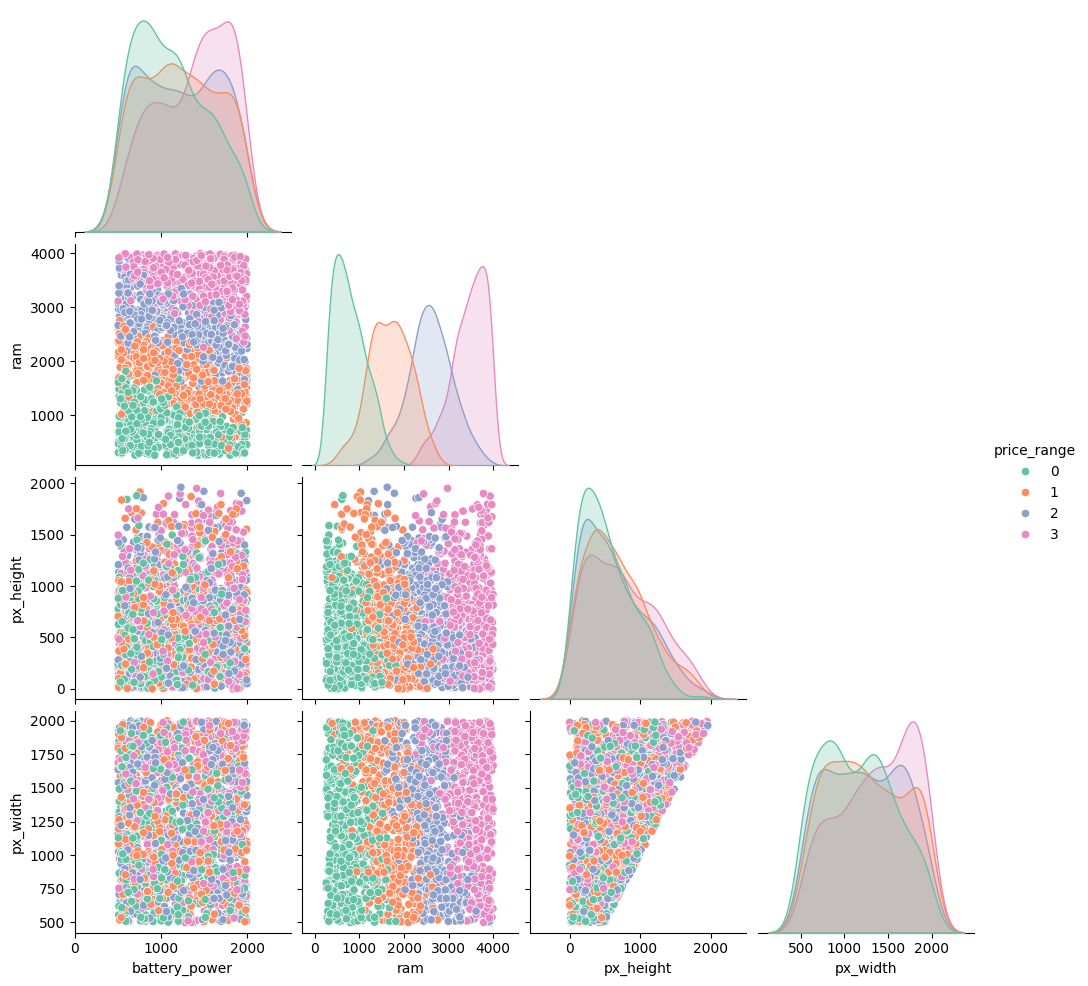

In [13]:
sns.pairplot(Train_df[['battery_power', 'ram', 'px_height', 'px_width', 'price_range']], hue='price_range', palette='Set2', corner=True)

<font size = 4.5>**Step 3: Preprocessing + Feature Scaling**</font>

- <font size = 3>**Split Data into Features & Labels**</font>

In [14]:
x = Train_df.drop("price_range", axis=1)
y = Train_df["price_range"]

- <font size = 3>**Train-Test Split for Validation**</font>

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape

(1600, 20)

In [17]:
x_val.shape

(400, 20)

- <font size = 3>**Feature Scaling (Logistic & SVM need it!--> StandardScaler or Min Max Scalling, etc)**</font>

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

- <font size = 3>**Prepare Test.csv for Final Prediction Later**</font>

In [19]:
x_test_final = Test_df.drop("id", axis=1)
x_test_final = scaler.transform(x_test_final)

<font size = 4.5>**Step 4: Train & Compare Multiple Models**</font>

- <font size = 3>**Logistic Regression**</font>

In [20]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(x_train_scaled, y_train)
log_preds = log_model.predict(x_val_scaled)

- <font size = 3>**Support Vector Machine (SVM)**</font>

In [21]:
svm_model = SVC(kernel="rbf", C=1, gamma='scale')
svm_model.fit(x_train_scaled, y_train)
svm_preds = svm_model.predict(x_val_scaled)

- <font size = 3>**Random Forest (No Scaling Needed)**</font>

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_val)

- <font size = 3>**Evaluate All Models**</font>

In [23]:
models = {
    "Logistic Regression": log_preds,
    "Support Vector Machine": svm_preds,
    "Random Forest": rf_preds
}

for name, preds in models.items():
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_val, preds))
    print(classification_report(y_val, preds))
    print()

----- Logistic Regression -----
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400


----- Support Vector Machine -----
Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400


----- Random Forest -----
Ac

- <font size = 3>**Confusion Matrix Heatmap (Optional but Cool)**</font>

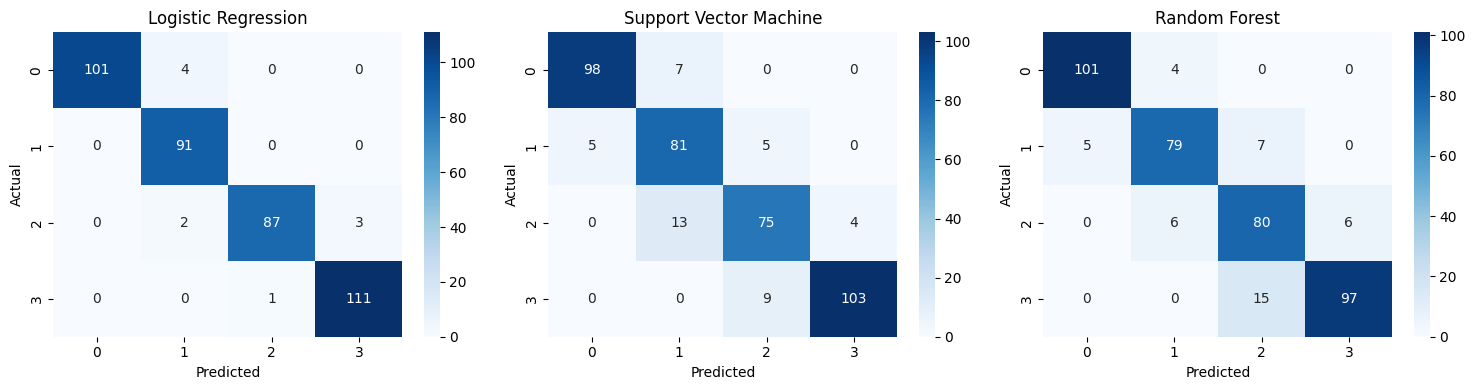

In [24]:
plt.figure(figsize=(15, 4))

for i, (name, preds) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_val, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

<font size = 4.5>**Step 5: Grid Search for Hyperparameter Tuning**</font>

- <font size=4.5>**Grid Search for SVM Model**</font>

In [25]:
svm_gs = SVC(random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

grid_search_svm = GridSearchCV(estimator=svm_gs,
                               param_grid=param_grid_svm,
                               cv=5,
                               n_jobs=-1,
                               scoring='accuracy',
                               verbose=2)

grid_search_svm.fit(x_train_scaled, y_train)
print("Best Parameters:", grid_search_svm.best_params_)

best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(x_val_scaled)

print("Accuracy of Tuned SVM:", accuracy_score(y_val, y_pred_best_svm))
print(classification_report(y_val, y_pred_best_svm))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of Tuned SVM: 0.9275
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.85      0.95      0.90        91
           2       0.91      0.87      0.89        92
           3       0.97      0.95      0.96       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



- <font size=4.5>**Grid Search for Random Forest Model**</font>

In [26]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator= rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_val)

print("Accuracy of Tuned RF:", accuracy_score(y_val, y_pred_best_rf))
print(classification_report(y_val, y_pred_best_rf))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of Tuned RF: 0.8875
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.86      0.87        91
           2       0.77      0.87      0.82        92
           3       0.94      0.86      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



<font size = 4.5>**Step 6: Final Prediction on test.csv**</font>

- <font size = 3>**Predict on Final Test Data**</font>

In [27]:
final_predictions = log_model.predict(x_test_final)

- <font size = 3>**Combine with Test IDs (if needed)**</font>

In [28]:
submission_df = pd.DataFrame({
    'id': Test_df['id'], 
    'price_range': final_predictions
})

In [29]:
submission_df.to_csv("final_submission.csv", index=False)
print("Submission file saved as final_submission.csv")

Submission file saved as final_submission.csv


## ✅ Final Results

| Model                 | Accuracy |
|-----------------------|----------|
| Logistic Regression   | 97.5%    |
| Tuned SVM             | 92.75%   |
| Random Forest         | 89.2%    |

📌 **Conclusion**: Logistic Regression performed best on this dataset. This suggests that the features are well-separated and a linear model is sufficient for high accuracy.


### 📤 Final Test Predictions

The best model was used to predict values on the unseen test dataset. These predictions can be used for further submission or validation.

<font size=5>**Author:**

- ***Prince Raj***